# Domain: Semiconductor manufacturing process

# CONTEXT: A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring ofsignals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

# DATA DESCRIPTION:  sensor-data.csv : (1567, 592)The data consists of 1567 datapoints each with 591 features. The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

# PROJECT OBJECTIVE: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

## Steps and tasks: [ Total Score: 60 points]

## 1. Import and understand the data. [5 Marks]

### A. Import ‘signal-data.csv’ as DataFrame. [2 Marks]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv("signal-data.csv")

### B. Print 5 point summary and share at least 2 observations. [3 Marks]

In [3]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


1. Attribute **5** appears to have... every value as equal to 100?? How else can minimum and maximum value of that attribute be equal?
2. Even the 75th percentile of the target attribute is   **-1**... looks like there is class imbalance over here
3.There are... too many features in the dataset
4.Also, names like  **0,1,2** are not telling us much, if anything, about the attributes themselves
5.As indicated by the  **count** row however, there are missing values in quite a few values, meaning data imputation must be performed


## 2. Data cleansing: [15 Marks]

### A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]

In [4]:
copy_ = dataset.copy()
copy_.reset_index(drop = True, inplace = True)
copy_.drop("Time", axis = 1, inplace = True)

#print(copy_.columns)
for column in copy_.columns:
    if len(copy_[copy_[column].isna() == True]) > 0.2 * len(copy_):
        copy_.drop(column, axis = 1, inplace = True)

copy_.fillna(copy_.mean(), inplace = True)

copy_.describe()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,12.485267,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,11.501550,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,13.817900,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


### B. Identify and drop the features which are having same value for all the rows. [3 Marks]

In [5]:
Dataset = copy_.copy()
Dataset.drop_duplicates(inplace = True)

Dataset

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,0.016200,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-0.000500,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,0.004100,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-0.012400,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-0.003100,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,-0.000841,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-0.007200,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,-1


***Looks there were no such duplicates***
### C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]


   1. As previously noted, I'm dropping feature 5 because all the values in that attribute are the same, meaning it just doesn't      have any relevant information
   2.  Similar for feature 13, all values are 0 in this case
   3.  Same for feature 42, all values are 70 here
   4.  Same for 49
   5.  Same for 52
   6.  Same for 69
   
   
   
...
...

Okay:

I'll drop all attributes whose standard deviation is 0


In [6]:
DATASET = Dataset.copy()
for col in DATASET.columns:
    if DATASET[col].std() == 0:
        DATASET.drop(col, inplace = True, axis = 1)
DATASET

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.500500,0.016200,-0.003400,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.496600,-0.000500,-0.014800,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.443600,0.004100,0.001300,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.488200,-0.012400,-0.003300,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.503100,-0.003100,-0.007200,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.342400,-0.004500,-0.005700,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.433300,-0.006100,-0.009300,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.462862,-0.000841,0.000146,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.462200,-0.007200,0.003200,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,-1


### D. Check for multi-collinearity in the data and take necessary action. [3 Marks]

In [7]:
import seaborn as sns

corr_matrix = DATASET.corr()
corr_matrix_mask = corr_matrix.copy()
print(corr_matrix.shape)
print(corr_matrix_mask.shape)

(443, 443)
(443, 443)


In [8]:
col_index = 0
num_strong_correlations = 0
for col in corr_matrix_mask.columns:
    #print(col)
    for index in range(0, len(corr_matrix_mask)):
        #print(index)
        if abs(corr_matrix_mask[col][index]) >= 0.6 and col_index <= index:
            corr_matrix_mask[col][index] = 0
            num_strong_correlations += 1
        else:
            corr_matrix_mask[col][index] = 1
    col_index += 1

print(f"{num_strong_correlations} strong_correlations found")

1430 strong_correlations found


In [9]:
443 * 443 // 2

98124

#### Out of 98124 combinations, there are 1430 strong correlations(+ve or -ve): This indicates a relatively high degree of multi-collinearity being present in the dataset , To fix this, we'll use PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components = 200)

**But to use PCA, we'll have to split our data and standardise it**

In [12]:
training_data = DATASET.drop("Pass/Fail", axis = 1)
testing_data = DATASET["Pass/Fail"]

train_data, test_data, train_labels, test_labels = train_test_split(training_data, testing_data, test_size = 0.25, random_state = 0)

In [13]:
std_scaler = StandardScaler()

training_data_scaled = std_scaler.fit_transform(train_data)
testing_data_scaled = std_scaler.fit_transform(test_data)

pca.fit(training_data_scaled)

PCA(n_components=200)

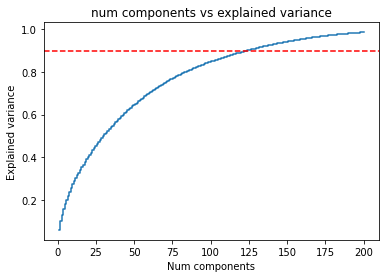

In [14]:
plt.step(range(1, 200+1), np.cumsum(pca.explained_variance_ratio_), where = "mid")
plt.xlabel("Num components")
plt.ylabel("Explained variance")
plt.axhline(y = 0.9, color = "red", linestyle = "--")
plt.title("num components vs explained variance")
plt.show()

In [15]:
for index, variance in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    print(index, ":", variance)

0 : 0.06008566284695899
1 : 0.10003837956959061
2 : 0.1312376245036003
3 : 0.15864510698191034
4 : 0.1811906672769124
5 : 0.20157781992328588
6 : 0.2211524550768587
7 : 0.23992865644999573
8 : 0.2576195435323482
9 : 0.2735700825107319
10 : 0.28800411847658003
11 : 0.30210576501153114
12 : 0.31558480095503494
13 : 0.3285951772060436
14 : 0.34150366919134323
15 : 0.3542088142746055
16 : 0.3663813247124012
17 : 0.3783195314302884
18 : 0.38994755663087527
19 : 0.4012862870937024
20 : 0.412113879489937
21 : 0.4224610635312153
22 : 0.432762134081974
23 : 0.4428390577084538
24 : 0.4528165248060096
25 : 0.46245510474006946
26 : 0.47191563033242795
27 : 0.481176507639389
28 : 0.49028130354737537
29 : 0.4990359593358342
30 : 0.5077018664179003
31 : 0.516155197774245
32 : 0.5243605444219864
33 : 0.5324809151689573
34 : 0.5404180403480737
35 : 0.5482185725044262
36 : 0.5558375217798364
37 : 0.5634395952093213
38 : 0.5708412497156578
39 : 0.5781842676827036
40 : 0.5854429409575964
41 : 0.5925143027

When time comes to apply PCA, we'll take **n_components** as 123, because that explains over 90% of the variance of the dataset

### E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]


Assumption : Any attribute that has less than 78 unique values(ie, less than 5% of the number of samples in the dataset) in the dataset are basically noise, because all the values are floating point here, it makes no sense that an attribute not have atleast 50-60% of it's values unique from each other. It could be something as small as the difference between 0.001 vs 0.002, but I'm observing features like **387** has a vast majority of values as 0, and only very few values >0, even those are less than 0.1 for the most part.

I'm assuming such features are irrelevant

Using 5% as threshold rather than 50-60% just to be conservative

Will also skip the target variable for obvious reasons,ie, It is not a **float** so the assumption doesn't hold

In [16]:
arr = DATASET.nunique()

for index, val in zip(arr.index, arr):
    print(index, ":", val)

0 : 1521
1 : 1505
2 : 508
3 : 519
4 : 504
6 : 511
7 : 90
8 : 1209
9 : 569
10 : 393
11 : 379
12 : 1548
14 : 1556
15 : 1562
16 : 1478
17 : 282
18 : 1549
19 : 362
20 : 552
21 : 1296
22 : 1177
23 : 1481
24 : 1495
25 : 705
26 : 625
27 : 1149
28 : 870
29 : 189
30 : 843
31 : 1276
32 : 339
33 : 331
34 : 330
35 : 332
36 : 331
37 : 326
38 : 330
39 : 334
40 : 292
41 : 316
43 : 1524
44 : 1377
45 : 1521
46 : 1563
47 : 1342
48 : 1487
50 : 1521
51 : 1563
53 : 154
54 : 170
55 : 108
56 : 188
57 : 160
58 : 383
59 : 1501
60 : 1499
61 : 1419
62 : 1519
63 : 1535
64 : 1497
65 : 1551
66 : 1560
67 : 1307
68 : 1480
70 : 1534
71 : 1558
74 : 3
75 : 676
76 : 892
77 : 843
78 : 996
79 : 692
80 : 923
81 : 581
82 : 889
83 : 1507
84 : 181
86 : 472
87 : 249
88 : 973
89 : 651
90 : 1514
91 : 1192
92 : 181
93 : 175
94 : 23
95 : 15
96 : 1334
98 : 1421
99 : 273
100 : 36
101 : 30
102 : 1067
103 : 154
104 : 56
105 : 178
106 : 181
107 : 1160
108 : 1184
113 : 468
114 : 20
115 : 1567
116 : 136
117 : 1527
118 : 329
119 : 249
120 

In [17]:
data = DATASET.copy()
for col in data.columns:
    if data[col].nunique() < 0.05 * len(data) and col != "Pass/Fail":
        data.drop(col, axis = 1, inplace = True)
        
print(data.shape)
data["Pass/Fail"]

(1567, 412)


0      -1
1      -1
2       1
3      -1
4      -1
       ..
1562   -1
1563   -1
1564   -1
1565   -1
1566   -1
Name: Pass/Fail, Length: 1567, dtype: int64

## 3. Data analysis & visualisation: [5 Marks]

### A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]

In [18]:
univariate_report = data.describe(include = "all")

**Not sure how to provide any detailed insights considering I don't know what the attribute even represents... Best I can do is print 5 point summary of the dataset cleaned so far**

In [19]:
for col in univariate_report.columns:
    print(f"Summary of attribute {col}:")
    print("\t Count:", univariate_report[col]["count"])
    print("\t Mean:", univariate_report[col]["mean"])
    print("\t Standard Deviation:", univariate_report[col]["std"])
    print("\t Minimum Value:", univariate_report[col]["min"])
    print("\t 25th percentile:", univariate_report[col]["25%"])
    print("\t 50th percentile:", univariate_report[col]["50%"])
    print("\t 75th percentile:", univariate_report[col]["75%"])
    print("\t Maximum Value:", univariate_report[col]["max"])

Summary of attribute 0:
	 Count: 1567.0
	 Mean: 3014.4528955797564
	 Standard Deviation: 73.48061348968113
	 Minimum Value: 2743.24
	 25th percentile: 2966.665
	 50th percentile: 3011.84
	 75th percentile: 3056.54
	 Maximum Value: 3356.35
Summary of attribute 1:
	 Count: 1567.0
	 Mean: 2495.850230769231
	 Standard Deviation: 80.22779299539822
	 Minimum Value: 2158.75
	 25th percentile: 2452.885
	 50th percentile: 2498.91
	 75th percentile: 2538.745
	 Maximum Value: 2846.44
Summary of attribute 2:
	 Count: 1567.0
	 Mean: 2200.547317707663
	 Standard Deviation: 29.38093247132199
	 Minimum Value: 2060.66
	 25th percentile: 2181.09995
	 50th percentile: 2200.9556
	 75th percentile: 2218.0555
	 Maximum Value: 2315.2667
Summary of attribute 3:
	 Count: 1567.0
	 Mean: 1396.3766273663878
	 Standard Deviation: 439.712851875681
	 Minimum Value: 0.0
	 25th percentile: 1083.8858
	 50th percentile: 1287.3538
	 75th percentile: 1590.1699
	 Maximum Value: 3715.0417
Summary of attribute 4:
	 Count: 15

### B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]


For bivariate and mutivariate analysis I'll print the correlation matrix between each attribute with ever other attribute

But I will only print properly those correlations which are useful, ie > 0.6 or < -0.6

I'm not drawing plots because it is infeasible to do so... there are too many columns, the computer hangs when I try, and even when I wait for the very long amount of time, the plot is incomprehensible



In [20]:
data.corr()

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,585,586,587,588,589,Pass/Fail
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,0.002270,0.031483,-0.052622,0.009045,0.006504,...,0.013228,0.008601,0.000224,0.023453,0.023589,0.018443,-0.025880,-0.028166,0.004174,-0.025141
1,-0.143840,1.000000,0.005767,-0.007568,-0.001636,-0.025564,-0.012037,0.031258,0.023964,0.009645,...,0.002570,-0.010145,0.043556,0.002904,0.002273,-0.009403,0.017266,0.010118,0.044797,-0.002603
2,0.004756,0.005767,1.000000,0.298935,0.095891,-0.136225,-0.146213,0.023528,0.016168,0.069893,...,0.002592,-0.028705,-0.006023,0.015697,0.015752,-0.025495,-0.029345,-0.030818,-0.032890,-0.000957
3,-0.007613,-0.007568,0.298935,1.000000,-0.058483,-0.685835,0.073856,-0.102892,0.068215,0.049873,...,0.008216,0.016438,0.008988,0.025436,0.026019,0.034711,-0.039132,-0.033645,-0.080341,-0.024623
4,-0.011014,-0.001636,0.095891,-0.058483,1.000000,-0.074368,-0.347734,-0.025946,0.054206,-0.006470,...,-0.012163,-0.004070,0.045081,-0.001300,-0.001616,-0.043929,-0.031005,-0.026100,0.050910,-0.013756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.018443,-0.009403,-0.025495,0.034711,-0.043929,-0.041209,0.058113,0.010433,0.033738,0.000327,...,-0.009905,-0.002684,-0.016726,0.002257,0.002743,1.000000,0.167913,0.164238,-0.486559,0.004156
587,-0.025880,0.017266,-0.029345,-0.039132,-0.031005,0.034027,-0.021426,0.022845,0.059301,0.046965,...,-0.001723,-0.009405,-0.024473,-0.002649,-0.002930,0.167913,1.000000,0.974276,0.390813,0.035391
588,-0.028166,0.010118,-0.030818,-0.033645,-0.026100,0.032227,-0.020893,0.026250,0.060758,0.046048,...,-0.011722,-0.015596,-0.020705,-0.002260,-0.002530,0.164238,0.974276,1.000000,0.389211,0.031167
589,0.004174,0.044797,-0.032890,-0.080341,0.050910,0.043777,-0.107804,-0.022770,0.004880,0.008393,...,-0.022567,-0.024766,0.041486,-0.003008,-0.003800,-0.486559,0.390813,0.389211,1.000000,-0.002653


In [21]:
corr_matrix___ = data.corr().unstack().sort_values(ascending = False).drop_duplicates()

for index, val in corr_matrix___.items():
    if abs(val) >= 0.6:
        print(f"{index} : {val}")

('0', '0') : 1.0
('140', '275') : 0.9999999763805133
('172', '174') : 0.9999998114016202
('307', '309') : 0.9999994239853178
('287', '152') : 0.9999970976317963
('390', '252') : 0.9999914227740376
('275', '4') : 0.9999755698304461
('4', '140') : 0.9999751247610734
('251', '389') : 0.9999393815150169
('585', '583') : 0.9998896745944839
('176', '447') : 0.9998871452073378
('523', '389') : 0.999856522563489
('268', '540') : 0.9998373075688736
('523', '251') : 0.9998371595428934
('248', '520') : 0.999731811527691
('282', '147') : 0.9995955653522274
('448', '177') : 0.9995369413388282
('187', '459') : 0.999527692573424
('148', '283') : 0.9995218286822916
('175', '446') : 0.9994829487948597
('525', '253') : 0.9993620852658531
('420', '147') : 0.9993363915870236
('467', '195') : 0.9992729354838393
('254', '526') : 0.9992562452131024
('135', '408') : 0.9991662845035244
('453', '181') : 0.9991299429621868
('221', '493') : 0.9989352206061557
('420', '282') : 0.9988349382002644
('148', '421') : 0

## 4. Data pre-processing: [10 Marks]

### A. Segregate predictors vs target attributes. [2 Marks]

In [22]:
final_set_data = data.drop("Pass/Fail", axis = 1)
final_set_label = data["Pass/Fail"]

### B. Check for target balancing and fix it if found imbalanced. [3 Marks]

In [23]:
final_set_label.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

High degree of imbalance found

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)

final_set_data_oversampled, final_set_labels_oversampled = smote.fit_resample(final_set_data, final_set_label)

final_set_labels_oversampled.value_counts()

-1    1463
 1    1463
Name: Pass/Fail, dtype: int64

### C. Perform train-test split and standardise the data or vice versa if required. [3 Marks]

In [25]:
final_train_data, final_test_data, final_train_labels, final_test_labels = train_test_split(final_set_data_oversampled, 
                                                                                            final_set_labels_oversampled, 
                                                                                            test_size = 0.25, 
                                                                                            random_state = 0)

In [26]:
scaled_final_train_data = std_scaler.fit_transform(final_train_data)
scaled_final_test_data = std_scaler.fit_transform(final_test_data)


### D. Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]

In [27]:
final_train_labels.value_counts()

 1    1117
-1    1077
Name: Pass/Fail, dtype: int64

In [28]:
final_test_labels.value_counts()

-1    386
 1    346
Name: Pass/Fail, dtype: int64

**Yes, both the classes are evenly represented as was the case in the original dataset(after SMOTE, that is)**

In [29]:
final_train_data.describe() - final_test_data.describe()

,0,1,2,3,4,6,7,8,9,10,...,575,576,577,582,583,585,586,587,588,589
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,...,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,-3.820539,-1.165718,-0.721031,-12.818810,2.048681,0.008000,-0.000436,0.003357,-0.000081,-0.000293,...,-0.001503,0.238625,-0.358787,0.000087,-0.000261,-0.056376,0.000130,0.000123,0.000042,2.475033
std,-1.772375,-2.877753,-1.014829,-25.813044,47.048597,-0.403860,0.005739,-0.003946,-0.000316,0.000286,...,-0.006620,0.433130,-1.304593,-0.000088,-0.006737,-1.406140,0.000516,-0.000207,0.000028,4.919844
min,-73.570000,-4.120000,0.000000,-711.025800,0.000000,0.000000,-0.116000,-0.009500,-0.014100,-0.006000,...,0.000000,0.254600,-0.855700,-0.002200,-0.000800,-0.169200,-0.012200,-0.001300,-0.000200,0.000000
25%,0.121652,-5.825007,-0.133169,1.434335,-0.004400,0.202294,0.000000,0.004566,0.000319,-0.000493,...,-0.002047,0.021000,-0.347004,0.000200,0.000084,0.013515,-0.000070,0.000195,0.000144,0.751923
50%,1.602585,-1.689409,-0.151948,0.124350,0.017539,0.068989,-0.000060,0.003568,-0.000096,-0.000786,...,-0.000285,-0.013344,-0.302225,0.000165,0.000213,0.044471,-0.000233,0.000768,0.000146,-0.473702
75%,-5.239518,3.902500,-0.377700,-17.250464,0.039750,-0.120317,-0.000005,0.003848,-0.000800,-0.000159,...,-0.002809,-0.028036,-0.005025,0.000087,0.000267,0.054619,0.000426,0.000251,-0.000042,4.678490
max,16.420000,6.980000,0.000000,184.805500,1110.339587,0.000000,0.001000,-0.002500,0.026500,0.013400,...,0.000000,2.246100,0.000000,0.000000,-0.005200,-0.640400,0.000000,0.009800,0.007800,158.123100


**Almost all values are close to 0, meaning all the statistical properties of the training and testing samples are very similar to each others as  well**

## 5. Model training, testing and tuning: [20 Marks]

### A. Use any Supervised Learning technique to train a model. [2 Marks]

In [30]:
from sklearn.linear_model import LogisticRegression


In [31]:
log_reg = LogisticRegression(random_state = 0, max_iter = 100000)
log_reg.fit(scaled_final_train_data, final_train_labels)

LogisticRegression(max_iter=100000, random_state=0)

In [32]:
from sklearn.metrics import classification_report
preds = log_reg.predict(scaled_final_test_data)
print(classification_report(y_true = final_test_labels,
                      y_pred = preds)
     )

              precision    recall  f1-score   support

          -1       0.90      0.86      0.88       386
           1       0.85      0.89      0.87       346

    accuracy                           0.88       732
   macro avg       0.88      0.88      0.88       732
weighted avg       0.88      0.88      0.88       732



### B. Use cross validation techniques. [3 Marks]

In [33]:
from sklearn.model_selection import cross_validate

cv_5fold_results = cross_validate(log_reg, scaled_final_train_data, final_train_labels, cv = 5, return_estimator = True)

print(max(cv_5fold_results["test_score"]))

0.9384965831435079


In [34]:
leave_one_out_cv_results = cross_validate(log_reg, scaled_final_train_data, final_train_labels, cv = min(final_train_labels.value_counts()), return_estimator = True)

In [35]:
print(max(leave_one_out_cv_results["test_score"]))

1.0


In [ ]:
loocv_preds = leave_one_out_cv_results["estimator"][0].predict(scaled_final_test_data)


l = []

for est in cv_5fold_results["estimator"]:
    l.append(est.score(scaled_final_test_data, final_test_labels))
print("For 5 fold cv : \n",max(l))

l = []
for est in leave_one_out_cv_results["estimator"]:
    l.append(est.score(scaled_final_test_data, final_test_labels))
print("For leave one out cv : \n",max(l))

For 5 fold cv : 
 0.8784153005464481
For leave one out cv : 
 0.8866120218579235

### C. Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks]

In [ ]:
log_reg.get_params()

In [39]:
param_list = {
    "penalty" : ["l1", "l2", "elasticnet"],
    "C" : [0.001, 0.01, 0.1, 1],
    "solver" : ["newton-cg", "lbfgs", "liblinear", "sag"]# , "saga"]              Removed saga because it's taking up too much time and not even providing best results
}
   

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
tuned_log_reg = GridSearchCV(log_reg, param_list, verbose = 3)

In [42]:
tuned_log_reg.fit(scaled_final_train_data, final_train_labels)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.490 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solve

C:\Users\Sam\.ipython\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sam\.ipython\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sam\.ipython\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Sam\.ipython\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(estimator=LogisticRegression(max_iter=100000, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             verbose=3)

In [43]:
sorted(tuned_log_reg.cv_results_["mean_test_score"])

[nan,
 nan,
 0.4908842221320769,
 nan,
 0.747497945725549,
 0.8327373337077834,
 0.8327373337077834,
 0.8341051164435568,
 0.8345586170312354,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.8783068617967359,
 0.8810413871293206,
 0.8810413871293206,
 0.8810413871293206,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.8856065570360199,
 nan,
 0.9083876805941274,
 0.9097544231909384,
 0.9097544231909384,
 0.9102089639175794,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.918416700471183,
 nan,
 0.9188691609198989,
 0.9202390239335976,
 0.9220603072570496,
 0.9220603072570496,
 nan,
 nan,
 nan,
 nan]

### D. Use any other technique/method which can enhance the model performance. [4 Marks]

I'll do PCA with **n_components** = 123

In [44]:
pca_ = PCA(n_components = 123)

pca_.fit(scaled_final_train_data)

PCA(n_components=123)

In [45]:
pca_scaled_final_train_data = pca_.transform(scaled_final_train_data)
pca_scaled_final_test_data = pca_.transform(scaled_final_test_data)

### E. Display and explain the classification report in detail. [3 Marks]

In [46]:
predss = tuned_log_reg.predict(scaled_final_test_data)
print(classification_report(y_pred = predss, y_true = final_test_labels))

              precision    recall  f1-score   support

          -1       0.90      0.86      0.88       386
           1       0.85      0.89      0.87       346

    accuracy                           0.88       732
   macro avg       0.88      0.88      0.88       732
weighted avg       0.88      0.88      0.88       732



1. The true postive rate for both Pass and Fail is very good, at 90% and 85% respectively
2. The True negative rate is also pretty high, 86% for Pass and 89% for Fail

The one below is the **old** one

In [49]:
print(classification_report(y_true = final_test_labels,
                      y_pred = preds))

              precision    recall  f1-score   support

          -1       0.90      0.86      0.88       386
           1       0.85      0.89      0.87       346

    accuracy                           0.88       732
   macro avg       0.88      0.88      0.88       732
weighted avg       0.88      0.88      0.88       732



### F. Apply the above steps for all possible models that you have learnt so far. [5 Marks]

In [50]:
from sklearn.svm import SVC

In [52]:
from sklearn.ensemble import RandomForestClassifier


svc_params = {
    'C': [0.1, 1, 10, 100, 1000, 10000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ["poly", "sigmoid"]}

In [53]:
random_forest_params = {
    "n_estimators" : [10, 100, 1000],
    "criterion" : ["gini", "entropy"],
    "max_depth" : ["None", 1,2,3,4],
    "max_features" : ["auto", "sqrt", "log2"],
    "class_weight" : ["balanced"],}

In [54]:
rf = RandomForestClassifier()

tuned_random_forest = GridSearchCV(rf, random_forest_params, verbose = 3)


svc = SVC()
tuned_svc = GridSearchCV(svc, svc_params, verbose = 3)


tuned_log_reg_pca = GridSearchCV(log_reg, param_list, verbose = 3)


tuned_random_forest.fit(pca_scaled_final_train_data, final_train_labels)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, n_estimators=100;, score=nan total time=   0.0

C:\Users\Sam\.ipython\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sam\.ipython\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sam\.ipython\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Sam\.ipython\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Sam\.ipython\lib\site-packages\joblib\parallel.

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': ['None', 1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             verbose=3)

In [55]:
tuned_svc.fit(pca_scaled_final_train_data, final_train_labels)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.954 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.945 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.945 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.950 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.945 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.469 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.467 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.431 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.472 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.441 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.954 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly', 'sigmoid']},
             verbose=3)

In [56]:
tuned_log_reg_pca.fit(pca_scaled_final_train_data, final_train_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.490 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solve

C:\Users\Sam\.ipython\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sam\.ipython\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sam\.ipython\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Sam\.ipython\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(estimator=LogisticRegression(max_iter=100000, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             verbose=3)

## 6. Post Training and Conclusion: [5 Marks]

#### A. Display and compare all the models designed with their train and test accuracies. [1 Marks]


In [57]:
rf_preds = tuned_random_forest.predict(pca_scaled_final_test_data)
svc_preds = tuned_svc.predict(pca_scaled_final_test_data)
log_reg_preds = tuned_log_reg_pca.predict(pca_scaled_final_test_data)
print("LOGISTIC REGRESSION :\n\n",classification_report(final_test_labels, log_reg_preds))
print("\n\n")
print("RANDOM FOREST :\n\n",classification_report(final_test_labels, rf_preds))
print("\n\n")
print("SVC : \n\n", classification_report(final_test_labels, svc_preds))
print("\n\n")

LOGISTIC REGRESSION :

               precision    recall  f1-score   support

          -1       0.84      0.79      0.81       386
           1       0.78      0.83      0.81       346

    accuracy                           0.81       732
   macro avg       0.81      0.81      0.81       732
weighted avg       0.81      0.81      0.81       732




RANDOM FOREST :

               precision    recall  f1-score   support

          -1       0.91      0.95      0.93       386
           1       0.94      0.90      0.92       346

    accuracy                           0.92       732
   macro avg       0.92      0.92      0.92       732
weighted avg       0.92      0.92      0.92       732




SVC : 

               precision    recall  f1-score   support

          -1       1.00      0.96      0.98       386
           1       0.96      1.00      0.98       346

    accuracy                           0.98       732
   macro avg       0.98      0.98      0.98       732
weighted avg     

B. Select the final best trained model along with your detailed comments for selecting this model. [1 Marks]
Best model in my opinion is the **SVC** model because it is **smaller** in size and **less complex** than the random forest classifier and delivers **superior** performance in **every aspect**

In [58]:
print(tuned_svc.best_params_)
print(tuned_random_forest.best_params_) # 1000 estimators is way too much

{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 1000}


### C. Pickle the selected model for future use. [2 Marks]

In [59]:
tuned_svc.best_estimator_

SVC(C=0.1, gamma=0.01, kernel='poly')

In [61]:
import pickle

with open("svc_model.pkl", "wb") as pickle_file:
    pickle.dump(tuned_svc.best_estimator_, pickle_file)

### D. Write your conclusion on the results. [1 Marks]

**1. Given how so much of the data had multi-collinearity, it is not a surprise that non-linear classifiers like SVM and Random Forest were able to achieve very high accuracy**


**2. It is very encouraging to see that removing nearly 75% of the attributes still allowed us to create a model with such high accuracy, further consolidating the fact that using dimensionality reduction techniques like PCA need not always be a compromise, rather they can also strength the signals that were getting drowned out previously**